<a href="https://colab.research.google.com/github/CogGal/CogGal/blob/master/StatMethodsPsy20_Lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3 - Separating two Normal distributions: 
## Central limit theorem, Normal distribution, Z-distribution, t-distribution


In [ ]:
#@title
import pandas as pd
import seaborn as sns
import numpy as np
import random
import io
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sns.set(style="white", palette="muted", color_codes=True)
sns.set(rc={'figure.figsize':(10,10)});
sns.set_context("talk")



def plot_dist(dist, bins="auto", kde=False, fit="None", color="b", stat="density",height=8, aspect=1):
  #for frequency - set stat to "count"
  #aspect*height=width
  plt.figure(0);
  sns.displot(dist, kde=kde,bins=bins,stat=stat,color=color,height=height, aspect=aspect);
  if (fit=="Normal") & (stat=="density"):  
    d = stats.norm.fit(dist)
    mu = d[0]; sigma = d[1]
    x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 200) #limits of dist
    plt.plot(x, stats.norm.pdf(x, mu, sigma),color="black");
  elif (fit=="F") & (stat=="density"):  
    d = stats.f.fit(dist)
    dfn = d[0]; dfd = d[1]
    interval = stats.f.interval(.995,dfn,dfd) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.f.pdf(x, dfn, dfd),color="black");
  elif (fit=="gamma") & (stat=="density"):  
    d = stats.gamma.fit(dist)
    a = d[0]; loc = d[1]; scale = d[2]
    interval = stats.gamma.interval(.995,a,loc,scale) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.gamma.pdf(x, a, loc, scale),color="black");
  elif (fit=="t") & (stat=="density"):  
    d = stats.t.fit(dist)
    a = d[0]; loc = d[1]; scale = d[2]
    interval = stats.t.interval(.995,a,loc,scale) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.t.pdf(x, a, loc, scale),color="black");

# Slide 0: In the previous lecture we discussed what are the important features that are needed to separate two distributions

## Question 1: What are the important paremeters for separating two samples?
### A. The number of observations and the variance of the samples
### B. The number of observations, the difference of the means, the variance of each sample
### C. The difference in their means and the variance of each sample
### D. The difference in their means

#Slide 1: Today, we will see how to separate two Normal distributions.

# Slide 2: But first, what is a Normal distribution and where can we find one?

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

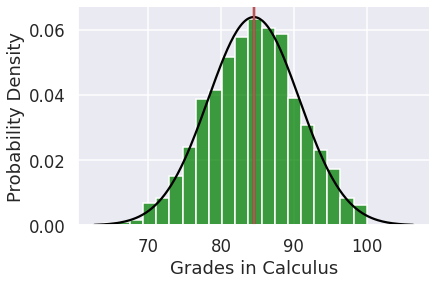

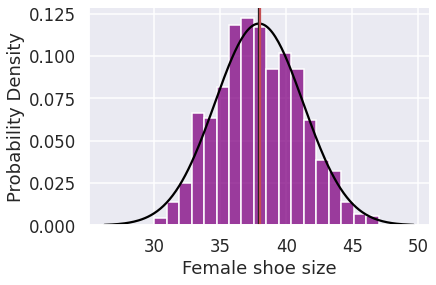

In [ ]:
#@title Normal probability density distribution
# Examples of Normal distribution
# 1) Grades distribution (use the one from Lecture 1)

# Show a sample with high variance
random.seed(6)
CalcSim = [i for i in np.random.normal(85, 6.5, 1000) if ((i<100) & (i>0))] 
plt.figure(1);
plot_dist(CalcSim, bins=20,color="green", kde=False, fit="Normal",height=4,aspect=1.6);

plt.xlabel('Grades in Calculus');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(CalcSim), color='k', linestyle='-');
plt.axvline(x=np.median(CalcSim), color='r', linestyle='-');

# 2) Shoe Size in women (use the answers from the questionnaire, meanwhile simulate, see here - https://thoughtburner.org/tag/normal-distribution/)
plt.figure(2);
FsizeSim = np.array([i for i in np.random.normal(38, 3.5, 1000) if ((i<49) & (i>30))]).round(0) 

plot_dist(FsizeSim, bins=18,color="purple", kde=False, fit="Normal",height=4,aspect=1.6);

plt.xlabel('Female shoe size');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(FsizeSim), color='k', linestyle='-');
plt.axvline(x=np.median(FsizeSim), color='r', linestyle='-');
# 3) Grades in classes (I'll bring the file from Stat 1 for Psy)
# 4) How many raisins do you get in a BranFlex (made up example)

#Slide 3: When should you expect to find a Normal distribution in your measurements? 
## 1. When the solution is a combination of sums of random variables - we'll get a Normal distribution (like rolling dice, tossing coins, answering exam questions). This result is often referred to as the **Central Limit Theorem**.
## 2. When the errors in the measurements are not related to the value of the mean

## Question 2: What are the characteristics of a Normal distribution?
### A. It's symmetric
### B. It has two parameters - the mean and the variance
### C. 95% of the data falls within approximately 2 standard deviations from the mean
### D. All of the above, classic answer

In [ ]:
#@title Normal distribution with 95% confidence inerval
# Show a Normal distribution and show the lines of percentiles (from both sides) according to the number they enter

def slide_CI(CI=95):
  np.random.seed(1)
  Sim = np.array([i for i in np.random.normal(0, 1, 3000)] )
  plt.figure(1,figsize=(10,8));
  plot_dist(Sim, bins=20,color="grey", kde=False, fit="Normal", height=6, aspect=1.6);
  plt.title("Change the size of confidence interval!")
  plt.xlabel('Deviation');
  plt.ylabel('Probability Density');

  plt.axvline(x=np.percentile(Sim,100-(100-CI)/2), color='g', linestyle='--');
  plt.axvline(x=np.percentile(Sim,(100-CI)/2), color='g', linestyle='--');

_=interact(slide_CI,CI=(50,99.99))

interactive(children=(FloatSlider(value=95.0, description='CI', max=99.99, min=50.0), Output()), _dom_classes=…

## Question 3: When wouldn't you get a Normal distribution?
### A. When the distribution is skewed to the left (death) or to the right (income)
### B. When the distribution represents a power-law (e.g. distributions that are based on social interactions)
### C. When there is equal probability to each event 
### D. Life is not Normal, we all know that...
### E. All of the above, classic answer

#Slide 4: Another way to think about sampling from a Normal distribution is as follows: 

# Each observation from the sample is going to be: 
## Observation number i = The mean of the sample + individual fluctuation

## $$ x_i = \overline{x} + \epsilon_i$$

## If we look on a group which got some treatment (for example, some drug A), we can also add the effect of the drug to all the observations of that group  - 
## Observation number i = The mean + drug effect + individual fluctuation.
## $$ x_i = \overline{x} + \alpha + \epsilon_i$$

### We assume that the treatment (the drug) is going to change the mean value for everyone in the group by a constant value (=$\alpha$).

#Slide 5: Let's say we sample a Normal distribution, what will the variance of the sample be?

In [ ]:
#@title Taking one sample and calculating the variance
# Sample a normal distribution and calculate the variance, increase n (10,20,30,40,100,1245 - let them play with the numbers)

def sample_var(sample_size=10):
  np.random.seed(4)
  sample=np.random.normal(20, 3, sample_size)
  print ("The true Variance is: 9")
  print ("The variance is:", np.var(sample ))
  # plt.figure(0,figsize=(7,5))
  # sns.distplot(sample,bins=7,kde=0)
  # plt.ylabel("Frequency")
  plt.figure(1,figsize=(7,5))
  plt.scatter(sample_size,np.var(sample),label="sample variance")
  plt.axhline(9,color="red",label="real variance")
  
  plt.legend()
  plt.ylabel("Variance")
  plt.xlabel("Sample size")
  plt.ylim(0,20)
  plt.xlim(sample_size-10,sample_size+10)
_=interact(sample_var,sample_size=(10,125))

interactive(children=(IntSlider(value=10, description='sample_size', max=125, min=10), Output()), _dom_classes…

In [ ]:
#@title Taking 1,000 samples and calculating the mean variance across all samples

def sample_var(sample_size=10):
  np.random.seed(4)
  jitter=np.random.normal(scale=.2,size=1000) # change to 0 to remove jitter
  print ("The true Variance is: 9")
  sampled_vars = [np.round(np.var(np.random.normal(20, 3, sample_size+1)),3 ) for i in range(1000) ]
  print("The variances of 1,000 samples:", ', '.join(map(str,sampled_vars[:10])),"...")
  print ("The mean variance of 1,000 samples is:", np.mean(sampled_vars))
  plt.figure(0,figsize=(10,8))
  plt.scatter(np.repeat(sample_size,1000)+jitter,sampled_vars,alpha=.03,label="Sample(s) variance")
  plt.scatter(sample_size,np.mean(sampled_vars),color="Magenta",label="Mean variance of 1,000 samples")

  plt.axhline(9,color="red",label="Real variance")
  
  plt.legend()
  plt.ylabel("Variance")
  plt.xlabel("Sample size")
  plt.ylim(0,20)
  plt.xlim(sample_size-10,sample_size+10)

_=interact(sample_var,sample_size=(3,125))

interactive(children=(IntSlider(value=10, description='sample_size', max=125, min=3), Output()), _dom_classes=…

###The graph below might take time to run... please wait for it if it's still running!

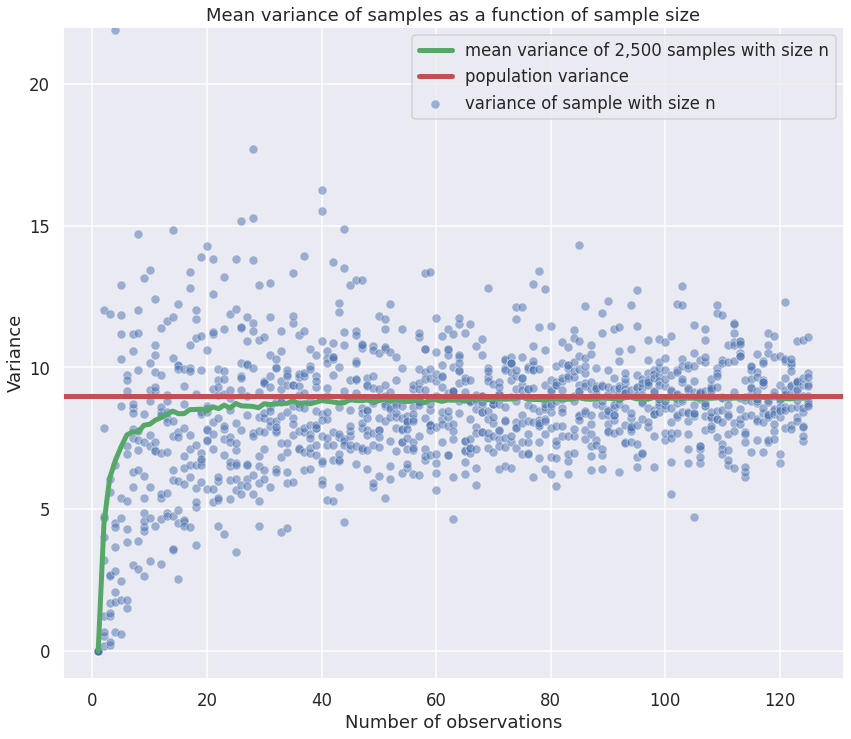

In [ ]:
#@title The mean Variance of taking many samples, each sample with n observations in it (the group size is n)

##blue - variance of sample of size 1-maxsize
##green - mean of variances from 1000 samples of size 1-maxsize
##red - actual variance

maxsize=125
np.random.seed(1)
normVar = np.zeros(maxsize)
normVarMean = np.zeros(maxsize)
manyVars_all_sizes=np.zeros(10*maxsize)
all_sizes = np.repeat(np.arange(125),10)+1
for n in range(0,maxsize):
  normVar[n] = np.var(np.random.normal(30, 3, n+1) )
  manyVars=[np.var(np.random.normal(30, 3, n+1) ) for i in range(2500) ]
  manyVars_all_sizes[n*10:(n+1)*10] = manyVars[:10]
  normVarMean[n] = np.mean(manyVars)

plt.figure(1,figsize=(14,12))

sns.scatterplot(x=all_sizes,y=manyVars_all_sizes,alpha=0.5, color="b",label="variance of sample with size n");
sns.lineplot(x=range(1,maxsize+1),y=normVarMean, color="g", linewidth=5, label= "mean variance of 2,500 samples with size n");
plt.title("Mean variance of samples as a function of sample size")
plt.ylim(-1,22);
plt.axhline(3**2, color='r', linewidth=5, label="population variance");
plt.xlabel('Number of observations');
plt.ylabel('Variance');
plt.legend();


#Slide 6: As we've seen in the first lecture, the variance of a sample from a Normal distribution does not exactly equal the variance of the distribution itself. Remember that! We'll need to fix this for when we compare Normal distributions.

# Slide 7: Ok, so we understand what a Normal distribution is. Now how to separate between two of them? 

# Slide 8: A close friend of the Normal distribution is the z-distribution - where we normalize all the values by their distance from the mean measured in units of standard deviation (because the variance (or standard deviation) is a measure of *distance* or *spread*). 

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

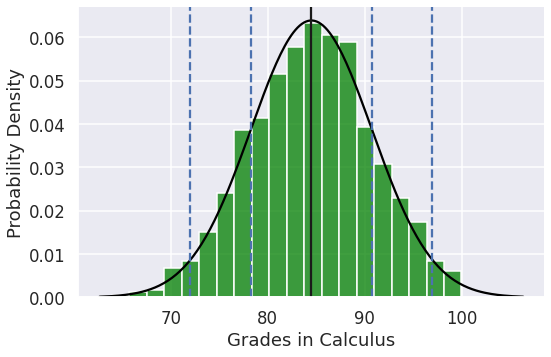

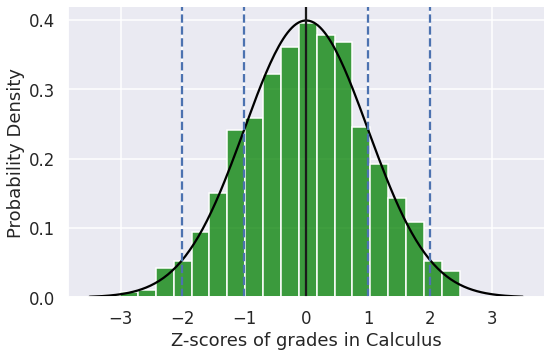

In [ ]:
#@title Normal distributions and their z-distributions
#Show the same examples as before (height, shoe size, exam grades, raisins) with the mean marked and the standard deviations lines marked as well
# Below them show the corresponding z-distributions of each one of them


plt.figure(1)
plot_dist(CalcSim, bins=20,color="green", kde=False, fit="Normal",height=5,aspect=1.6);

plt.xlabel('Grades in Calculus');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(CalcSim), color='k', linestyle='-');
plt.axvline(x=np.mean(CalcSim)+np.std(CalcSim), color='b', linestyle='--');
plt.axvline(x=np.mean(CalcSim)-np.std(CalcSim), color='b', linestyle='--');
plt.axvline(x=np.mean(CalcSim)+2*np.std(CalcSim), color='b', linestyle='--');
plt.axvline(x=np.mean(CalcSim)-2*np.std(CalcSim), color='b', linestyle='--');

CalcSimZ = (CalcSim-np.mean(CalcSim))/np.std(CalcSim)
plt.figure(2)
plot_dist(CalcSimZ, bins=20,color="green", kde=False, fit="Normal",height=5,aspect=1.6);

plt.xlabel('Z-scores of grades in Calculus');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(CalcSimZ), color='k', linestyle='-');
plt.axvline(x=np.mean(CalcSimZ)+np.std(CalcSimZ), color='b', linestyle='--');
plt.axvline(x=np.mean(CalcSimZ)-np.std(CalcSimZ), color='b', linestyle='--');
plt.axvline(x=np.mean(CalcSimZ)+2*np.std(CalcSimZ), color='b', linestyle='--');
plt.axvline(x=np.mean(CalcSimZ)-2*np.std(CalcSimZ), color='b', linestyle='--');



<Figure size 720x720 with 0 Axes>

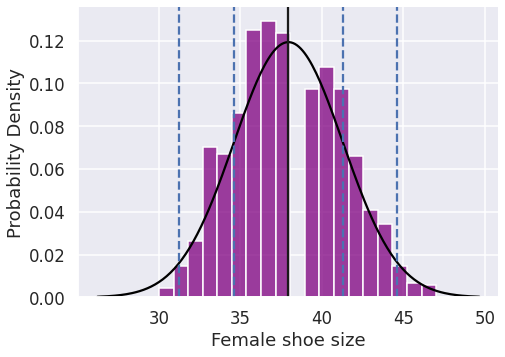

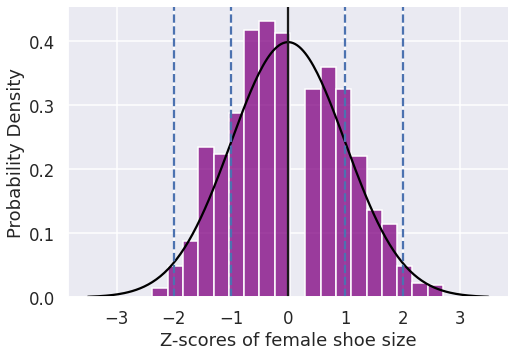

In [ ]:
#@title
plt.figure(0);

plot_dist(FsizeSim, bins=19,color="purple", kde=False, fit="Normal",height=5,aspect=1.5);

plt.xlabel('Female shoe size');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(FsizeSim), color='k', linestyle='-');
plt.axvline(x=np.mean(FsizeSim)+np.std(FsizeSim), color='b', linestyle='--');
plt.axvline(x=np.mean(FsizeSim)-np.std(FsizeSim), color='b', linestyle='--');
plt.axvline(x=np.mean(FsizeSim)+2*np.std(FsizeSim), color='b', linestyle='--');
plt.axvline(x=np.mean(FsizeSim)-2*np.std(FsizeSim), color='b', linestyle='--');

FsizeSimZ = (FsizeSim-np.mean(FsizeSim))/np.std(FsizeSim)

plt.figure(1)
plot_dist(FsizeSimZ, bins=19,color="purple", kde=False, fit="Normal",height=5,aspect=1.5);

plt.xlabel('Z-scores of female shoe size');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(FsizeSimZ), color='k', linestyle='-');
plt.axvline(x=np.mean(FsizeSimZ)+np.std(FsizeSimZ), color='b', linestyle='--');
plt.axvline(x=np.mean(FsizeSimZ)-np.std(FsizeSimZ), color='b', linestyle='--');
plt.axvline(x=np.mean(FsizeSimZ)+2*np.std(FsizeSimZ), color='b', linestyle='--');
plt.axvline(x=np.mean(FsizeSimZ)-2*np.std(FsizeSimZ), color='b', linestyle='--');

# Slide 9: We said before that in order to separate between two groups we should care about the difference between the means, the variance of each sample, and the number of samples in each group. 
## The Normal distribution and the Z-distributions are not good candidates for that task. That's because they do not represent well the fact that we always have the distribution of the sample and not the distribution of the population, so the variance of the sample and the variance of the population are different. This discounts the important factor of how many data-points we collected in each group.
## In order to correct for that, we will use another distribution which is called the t-distribution.

## Question 4: Would the t-distribution be wider or narrower from the z-distribution? How does it depend on N (number of observations)?
### A. Narrower. The more observations we have it will increase our accuracy of the mean.
### B. Wider. The more observations we have the closer we get to the "ideal" case of the z-distribution and the t-distribution will get narrower and narrower with N.
### C. Narrower. The more observations we have the more accurate is the measurement of variance.
### D. Wider. The more observations we have, the more variance we get and the t-distribution will get wider and wider with N.

# Slide 10: Here is the formula for the t-value compared with the formula for the z-value: 
## t-value = (Variable - mean) / sampled standard error
## $$ \textrm{t-value} = \frac{x_i-\overline{x}}{\textrm{sampled SE}}$$
## z-value = (Variable - mean) / distribution's standard error
## $$ \textrm{z-value} = \frac{x_i-\overline{x}}{\textrm{distribution SE}}$$

# So the difference between the two is the fact that in real life we don't have the distribution itself but rather only a sample of it (and so we do not know the real distribution nor its variance or standard deviation, we can only estimate it).

# Slide 11: When we have two Normal distributions that we sampled, it is also important to consider how many observations we have for each sample.

## **What's going on below?**
### 1. We take two samples from two Normal distributions that represent the (fictitious) populations. You can control the mean and the variance of each distribution as well as how many data points we have in each sample from each group. These two samples are shown in the first graph below.
### 2. Next, we want to know how reliable is the mean of each sample (which is similar to trying to compute the mean distribution). To that aim, we sample with replacements (bootstrap) each sample (group).
### 3. We calculate the mean of the new sample
### 4. We repeat this procedure 10,000 times and plot the distribution of the means of the two groups. This is shown in the second graph below.

In [ ]:
#@title Two samples from normal distributions
# Show two Normal distributions with ability to change mean difference, variance, and number of observations (like in lecture 2)

#########change to play with the distributions
meanA = 70
stdA = 10
sizeA=20
meanB = 90
stdB=10
sizeB=50
#########
def boot_2_dists(meanA = 70,stdA = 10,sizeA=20,
                 meanB = 90,stdB=10,sizeB=50):
  np.random.seed(4)
  distA = np.random.normal(meanA, stdA, sizeA)
  distB = np.random.normal(meanB, stdB, sizeB)
  ######
  fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(15,7))
  
  ax1.hist(distA, bins=12,color="green",label="A");
  ax1.hist(distB, bins=12,color="orange",label="B");
  ax1.legend()
  ax1.set_title("Samples from the normal\n distributions you defined")

  ###
  bootstrap_sizeA=sizeA;
  bootstrap_sizeB=sizeB;
  bootstrap_reps=10000;
  ###

  bootstrapA = np.zeros(bootstrap_reps)
  bootstrapB = np.zeros(bootstrap_reps)
  for i in range(bootstrap_reps):
    bootstrapA[i] = np.mean(np.random.choice(distA,bootstrap_sizeA))
    bootstrapB[i] = np.mean(np.random.choice(distB,bootstrap_sizeB))
  ax2.hist(bootstrapA, bins=12,color="lightgreen", label="A");
  ax2.hist(bootstrapB, bins=12,color="gold",label="B");
  ax2.legend()
  ax2.set_title("Bootstrap distributions\n of the samples means");
  ax2.set_xlim(min(meanA,meanB)-2*max(stdA,stdB),max(meanA,meanB)+2*max(stdA,stdB))
_=interact(boot_2_dists,meanA = 70,stdA = (10,100),sizeA=(10,100),
                 meanB = 90,stdB=(10,100),sizeB=(10,100))

interactive(children=(IntSlider(value=70, description='meanA', max=210, min=-70), IntSlider(value=10, descript…

# Slide 12: So the t-value will be the difference between the means, divided by a measure to the spread of the groups.
# Here is the formula for the t-value of the t-test for comparing one sample against a known mean (denoted $\mu$):
## $$ \textrm{t-value}_{(n-1)} =\frac{mean_1 - \textrm{known mean}}{\textrm{sampled standard error}}= \frac{\overline{x}_1-\mu}{S_1\sqrt{\frac{1}{n}}} $$

# Here is the formula for the t-value of the t-test when we assume the variances are the same in the groups (so to get the measure for this variance, we average the variances of the two groups):
## $$ \textrm{t-value} =\frac{mean_1 - mean_2}{\textrm{joint sampled standard error}} = \frac{\overline{x}_1-\overline{x}_2}{S_{pooled}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} $$


#Slide 13: You should remember these formulas, but also remember the logic we used so far - the two samples are not the same if their means are far apart when you consider the variance of each sample and the number of samples you have for each group.

# Slide 14: To gain a good separation between the groups, common practice suggests you should look for a t-value which is higher than 95% of the t-distribution. What is that value in the t-distribution?

In [ ]:
#@title The t-distribution
# Show a t-distribution, let them play with the statistic and number of degrees of freedom and highlight the area to the left of the variable (one way)


def plot_t_1_tail(df=5,alpha=0.05):
  np.random.seed(1)
  tDist=np.random.standard_t(df,100000)
  typeI = np.percentile(tDist,100-100*alpha)
  pdf_typeI = stats.t.pdf(typeI,df,np.mean(tDist))
  pdf_mean = stats.t.pdf(np.mean(tDist),df,np.mean(tDist))

  print("t value for which p<",alpha,": ", typeI)
  plot_dist(tDist, bins=50,color="lightblue",fit="t");
  plt.ylim(0,1.1*pdf_mean);
  plt.xlim(-5.5,5.5);

  plt.axvline(x=typeI, ymin=0,ymax=pdf_typeI/(1.1*pdf_mean), color='black', linestyle='--');

_=interact(plot_t_1_tail,df=(3,500,10),alpha=(0.01,0.49,.01))

interactive(children=(IntSlider(value=5, description='df', max=500, min=3, step=10), FloatSlider(value=0.05, d…

In [ ]:
#@title The t-distribution - two tailed
# Show a t-distribution, let them play with the statistic and number of degrees of freedom and highlight the area to the left and right of the variable (two way)
def plot_t_2_tail(df=5,alpha=0.05):

  tDist=np.random.standard_t(df,100000)
  typeIr = np.percentile(tDist,100-100*alpha/2)
  typeIl = np.percentile(tDist,100*alpha/2)
  pdf_typeIr = stats.t.pdf(typeIr,df,np.mean(tDist))
  pdf_typeIl = stats.t.pdf(typeIl,df,np.mean(tDist))
  pdf_mean = stats.t.pdf(np.mean(tDist),df,np.mean(tDist))

  print("t values for which p<",alpha,": ", typeIr, typeIl)
  plot_dist(tDist, bins=50,color="lightblue",fit="t");
  plt.ylim(0,1.1*pdf_mean);
  plt.xlim(-5.5,5.5);

  plt.axvline(x=typeIr, ymin=0,ymax=pdf_typeIr/(1.1*pdf_mean), color='black', linestyle='--');
  plt.axvline(x=typeIl, ymin=0,ymax=pdf_typeIl/(1.1*pdf_mean), color='black', linestyle='--');

_=interact(plot_t_2_tail,df=(3,500,10),alpha=(0.01,0.49,.01))

interactive(children=(IntSlider(value=5, description='df', max=500, min=3, step=10), FloatSlider(value=0.05, d…

# Slide 15: Finally, a word of caution - what we are calculating is the p-value which assumes the null hypothesis is true. But not always it is easy to assert that this also means that what we found is the truth. 

#Slide 16: For example, consider a DNA matching case for finding a murderer:
## Let's say I live in LA and there was a murder there. The police found DNA in the murder scene, and that DNA matches my own. The expert witness in the trial will say that there's a p-value of 1 to a million (p=0.000001) that two DNA would match in the test but be actually not the same, so it must be me. However,I will claim that since there are 4 million people in LA, this means that there are 4 other people besides the murderer that might be flagged as killers, so actually there's only 20% chance it is me... Who is right?

## Question 5: What is one of the assumptions of a t-test?
### A. That we have good sampling of the two groups.
### B. That the two groups are Normally distributed
### C. That the variances of the samples are small
### D. That the number of observations in each sample is the same.

# Extras

<Figure size 720x720 with 0 Axes>

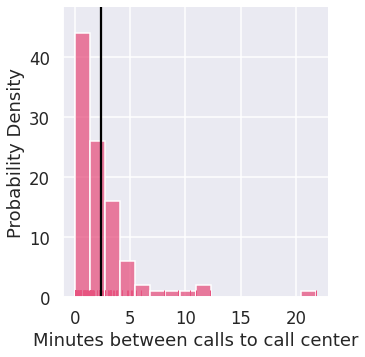

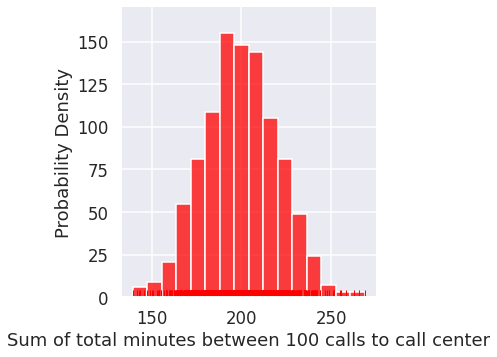

In [ ]:
#@title
# Show the distribution (1000 repeats) of a random variable that is the sum of 100 samples of either 1) Normal dist 2) Exponential distribution, and 3) Zipf or other power-law 

Sim = np.array([i for i in np.random.exponential(2, 100)] )
plt.figure(1)
sns.displot(Sim, bins=16,color="#e75480", kde=False, rug=True);

plt.xlabel('Minutes between calls to call center');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(Sim), color='black', linestyle='-');

SimSum = np.zeros(1000)
for i in range(0,1000): ##summing 1000 exponential samples and shows their distribution 
  newSum = np.sum(np.array([i for i in np.random.exponential(2, 100)] ))
  SimSum[i-1] =newSum
  
plt.figure(2)
sns.displot(SimSum, bins=16,color="red", kde=False, rug=True);

plt.xlabel('Sum of total minutes between 100 calls to call center');
plt.ylabel('Probability Density');